In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'E:\OSU Lesson\Fall 2020\MSIS 5193\Project\chicago_listings.csv')
df = df.drop(columns = ['occupancy1','no_of_rooms','no_of_guests','url'])

In [3]:
df.shape

(419, 15)

In [4]:
df.head()

,title,hotel_star,price,total_rooms,rating_avg,total_reviews,rating_cat,checkin,checkout,checkin_from,checkin_to,checkin_duration,map,lat,long
0,The Whitehall Hotel,4.0,78,222.0,8.2,3367,Very Good,3 PM-5:30 AM,noon,3:00 PM,5:30 AM,14,"['41.899014', '-87.625717']",41.899014,-87.625717
1,Hyatt Place Chicago/River North,3.5,119,212.0,9.0,947,Superb,3 PM-midnight,noon,3:00 PM,midnight,9,"['41.890852', '-87.630569']",41.890852,-87.630569
2,Hampton Inn by Hilton Chicago-Midway Airport,2.5,104,170.0,8.4,468,Very Good,3 PM-1 AM,noon,3:00 PM,1:00 AM,10,"['41.774124', '-87.742222']",41.774124,-87.742222
3,Silversmith Hotel Chicago Downtown,4.0,109,144.0,9.2,1823,Superb,3:00 PM-2:00 AM,noon,3:00 PM,2:00 AM,11,"['41.881731', '-87.626272']",41.881731,-87.626272
4,Fairfield Inn & Suites Chicago Downtown/River ...,3.0,109,180.0,9.2,705,Superb,3 PM-midnight,noon,3:00 PM,midnight,9,"['41.890861', '-87.630162']",41.890861,-87.630162


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             419 non-null    object 
 1   hotel_star        419 non-null    float64
 2   price             419 non-null    int64  
 3   total_rooms       419 non-null    int32  
 4   rating_avg        419 non-null    float64
 5   total_reviews     419 non-null    int64  
 6   rating_cat        418 non-null    object 
 7   checkin           419 non-null    object 
 8   checkout          419 non-null    object 
 9   checkin_from      419 non-null    object 
 10  checkin_to        419 non-null    object 
 11  checkin_duration  419 non-null    int64  
 12  map               419 non-null    object 
 13  lat               419 non-null    float64
 14  long              419 non-null    float64
dtypes: float64(4), int32(1), int64(3), object(7)
memory usage: 47.6+ KB


In [48]:
df = df.fillna(df.mean())

In [49]:
df['total_rooms'] = df['total_rooms'].astype(int)

In [50]:
df.describe()

,hotel_star,price,total_rooms,rating_avg,total_reviews,checkin_duration,lat,long
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,3.124105,107.014320,184.513126,8.300723,591.174224,11.735084,41.891849,-87.786411
std,0.738624,48.150678,177.268730,0.822864,549.630760,5.635158,0.138859,0.165312
min,1.500000,39.000000,3.000000,6.000000,2.000000,2.000000,41.538411,-88.082113
25%,2.500000,79.000000,98.500000,7.800000,234.500000,9.000000,41.845633,-87.936688
50%,3.000000,99.000000,136.000000,8.400000,424.000000,9.000000,41.892490,-87.790249
75%,3.500000,119.000000,219.500000,8.800000,779.500000,12.000000,41.992722,-87.630023
max,5.000000,399.000000,2019.000000,9.800000,3683.000000,24.000000,42.162794,-87.435160


In [ ]:
df[df['total_rooms']>2000]

In [7]:
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['title', 'rating_cat', 'checkin', 'checkout', 'checkin_from',
       'checkin_to', 'map'],
      dtype='object')

In [8]:
df_cat.mode().loc[0]

title           Cambria Hotel Chicago Loop - Theatre District
rating_cat                                               Good
checkin                                         3 PM-midnight
checkout                                                 noon
checkin_from                                          3:00 PM
checkin_to                                           midnight
map                               ['41.555311', '-87.795554']
Name: 0, dtype: object

In [10]:
df_cat[df_cat['title']== 'Cambria Hotel Chicago Loop - Theatre District']

,title,rating_cat,checkin,checkout,checkin_from,checkin_to,map
16,Cambria Hotel Chicago Loop - Theatre District,Superb,4:00 PM-midnight,11:00 AM,4:00 PM,midnight,"['41.884497', '-87.629014']"
56,Cambria Hotel Chicago Loop - Theatre District,Superb,4:00 PM-midnight,11:00 AM,4:00 PM,midnight,"['41.884497', '-87.629014']"


# Data Analysis

## Numeric variables

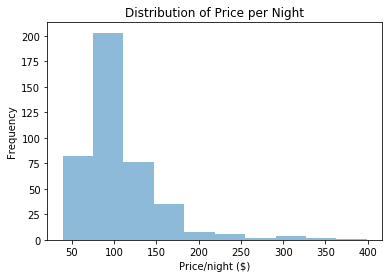

<Figure size 576x432 with 0 Axes>

In [25]:
df['price'].plot.hist(alpha=0.5)
title = plt.title("Distribution of Price per Night")
plt.xlabel('Price/night ($)')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

Text(0.5, 0, 'Price/night ($)')

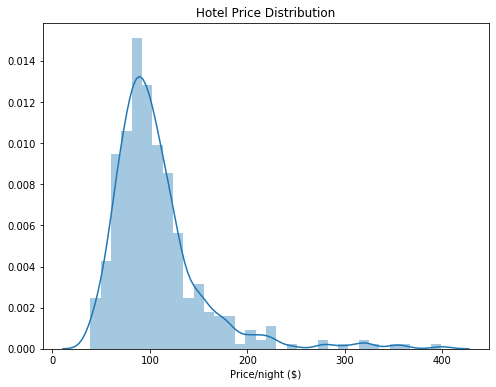

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(df['price'])
title = plt.title("Hotel Price Distribution")
plt.xlabel('Price/night ($)')

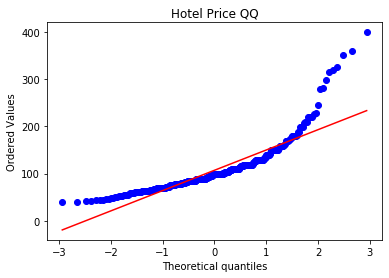

In [30]:
price_d = stats.probplot(df['price'], plot=plt)
title = plt.title("Hotel Price QQ")

Text(0.5, 0, 'Price/night ($)')

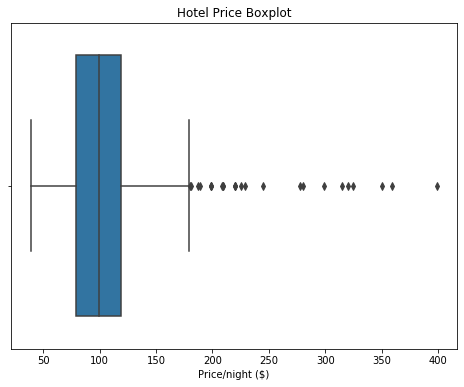

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(df['price'])
title = plt.title("Hotel Price Boxplot")
plt.xlabel('Price/night ($)')

In [31]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 2.486906
Kurtosis: 9.099771


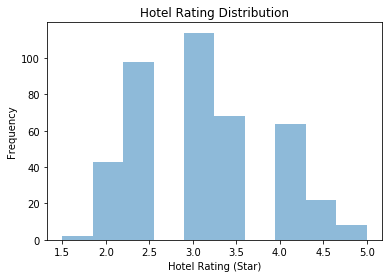

<Figure size 576x432 with 0 Axes>

In [35]:
df['hotel_star'].plot.hist(alpha=0.5)
plt.title ('Hotel Rating Distribution')
plt.xlabel('Hotel Rating (Star)')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

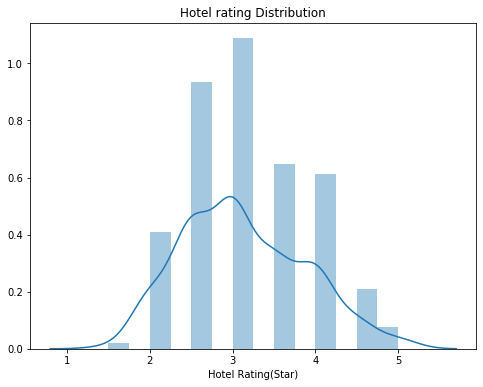

In [37]:
plt.figure(figsize=(8,6))
sns.distplot(df['hotel_star'])
plt.xlabel('Hotel Rating(Star)')
title = plt.title("Hotel rating Distribution")

Text(0.5, 1.0, 'Hotel Star QQ')

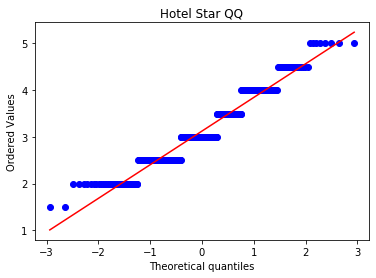

In [38]:
stats.probplot(df['hotel_star'], plot=plt)
plt.title("Hotel Star QQ")

Text(0.5, 0, 'Hotel Rating(Star)')

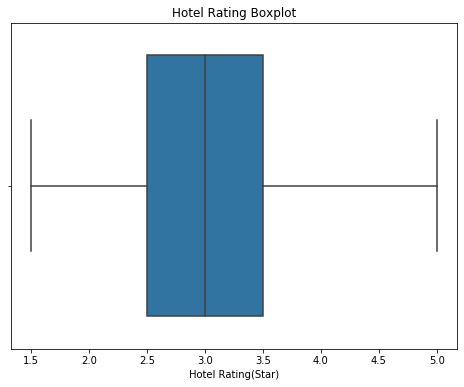

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(df['hotel_star'])
title = plt.title("Hotel Rating Boxplot")
plt.xlabel('Hotel Rating(Star)')

In [39]:
#skewness and kurtosis
print("Skewness: %f" % df['hotel_star'].skew())
print("Kurtosis: %f" % df['hotel_star'].kurt())

Skewness: 0.376075
Kurtosis: -0.458037


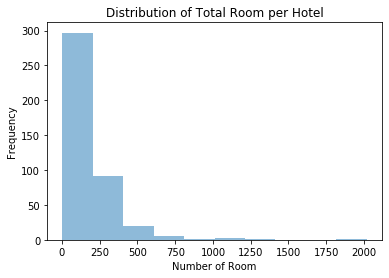

<Figure size 576x432 with 0 Axes>

In [51]:
df['total_rooms'].plot.hist(alpha=0.5)
title = plt.title("Distribution of Total Room per Hotel")
plt.xlabel('Number of Room')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

Text(0.5, 0, 'Number of Room')

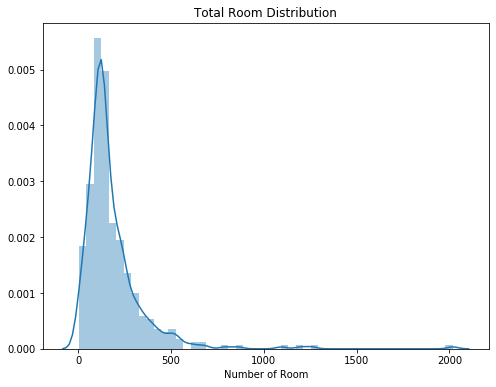

In [52]:
plt.figure(figsize=(8,6))
sns.distplot(df['total_rooms'])
title = plt.title("Total Room Distribution")
plt.xlabel('Number of Room')

Text(0.5, 1.0, 'Total Room QQ')

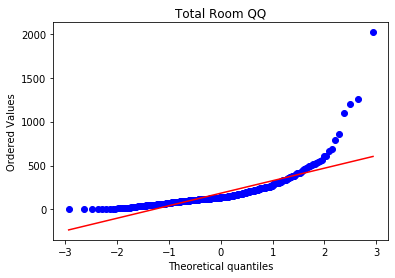

In [53]:
stats.probplot(df['total_rooms'], plot=plt)
plt.title("Total Room QQ")

Text(0.5, 0, 'Number of Room')

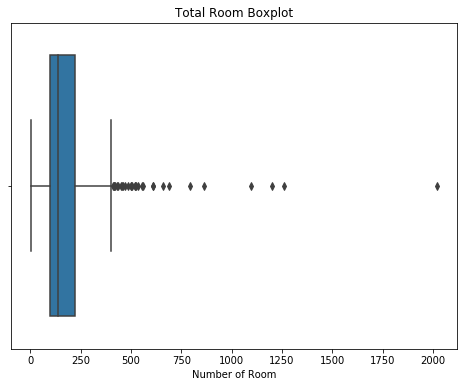

In [54]:
plt.figure(figsize=(8,6))
sns.boxplot(df['total_rooms'])
title = plt.title("Total Room Boxplot")
plt.xlabel('Number of Room')

In [55]:
#skewness and kurtosis
print("Skewness: %f" % df['total_rooms'].skew())
print("Kurtosis: %f" % df['total_rooms'].kurt())

Skewness: 4.552327
Kurtosis: 34.247762


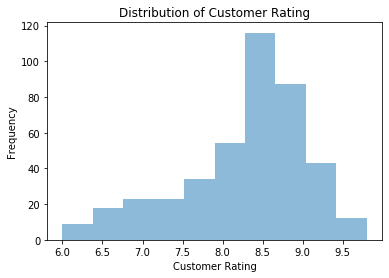

<Figure size 576x432 with 0 Axes>

In [56]:
df['rating_avg'].plot.hist(alpha=0.5)
title = plt.title("Distribution of Customer Rating")
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

Text(0.5, 0, 'Customer Rating')

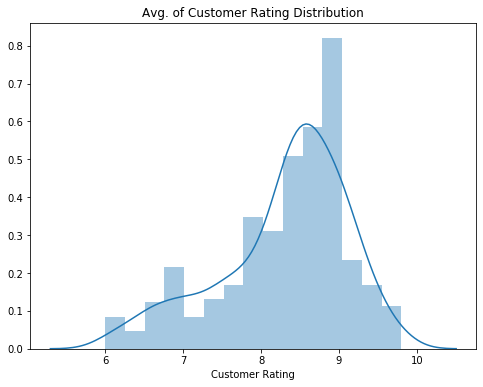

In [58]:
plt.figure(figsize=(8,6))
sns.distplot(df['rating_avg'])
plt.title("Avg. of Customer Rating Distribution")
plt.xlabel("Customer Rating")

Text(0.5, 1.0, 'Customer Rating QQ')

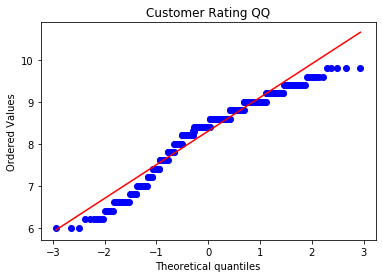

In [60]:
stats.probplot(df['rating_avg'], plot=plt)
plt.title("Customer Rating QQ")

Text(0.5, 0, 'Customer Rating')

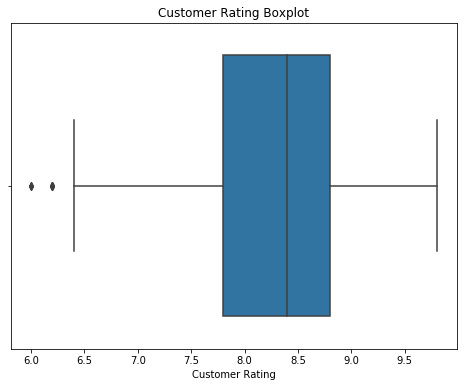

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(df['rating_avg'])
title = plt.title("Customer Rating Boxplot")
plt.xlabel('Customer Rating')

In [62]:
#skewness and kurtosis
print("Skewness: %f" % df['rating_avg'].skew())
print("Kurtosis: %f" % df['rating_avg'].kurt())

Skewness: -0.794962
Kurtosis: 0.094339


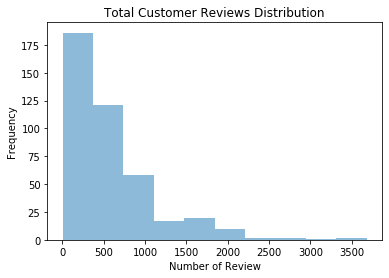

<Figure size 576x432 with 0 Axes>

In [65]:
df['total_reviews'].plot.hist(alpha=0.5)
plt.title("Total Customer Reviews Distribution")
plt.xlabel('Number of Review')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

Text(0.5, 0, 'Number of Review')

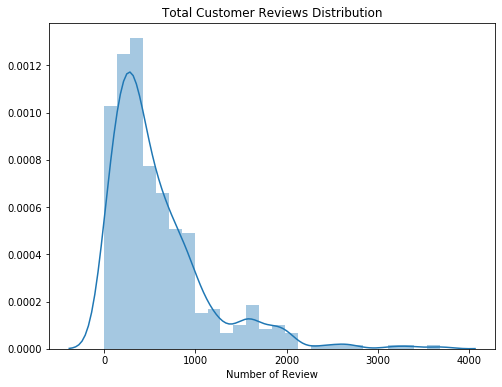

In [64]:
plt.figure(figsize=(8,6))
sns.distplot(df['total_reviews'])
title = plt.title("Total Customer Reviews Distribution")
plt.xlabel("Number of Review")

Text(0.5, 1.0, 'Total Review QQ')

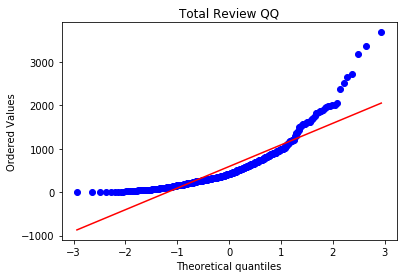

In [66]:
stats.probplot(df['total_reviews'], plot=plt)
plt.title("Total Review QQ")

Text(0.5, 0, 'Number of Review')

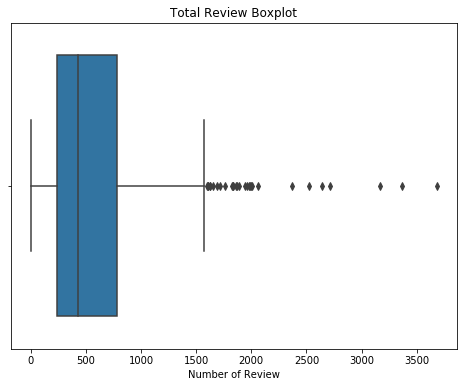

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(df['total_reviews'])
title = plt.title("Total Review Boxplot")
plt.xlabel('Number of Review')

In [68]:
#skewness and kurtosis
print("Skewness: %f" % df['total_reviews'].skew())
print("Kurtosis: %f" % df['total_reviews'].kurt())

Skewness: 2.045136
Kurtosis: 5.710360


## Hotel price against numeric variables

Text(0, 0.5, 'Price/night($)')

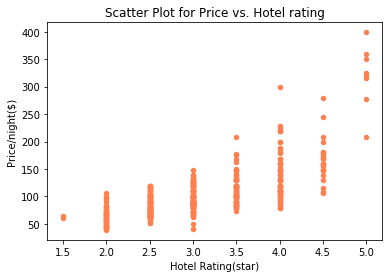

In [73]:
df.plot.scatter(x='hotel_star',y='price',c='coral')
title = plt.title('Scatter Plot for Price vs. Hotel rating')
plt.xlabel('Hotel Rating(star)')
plt.ylabel('Price/night($)')

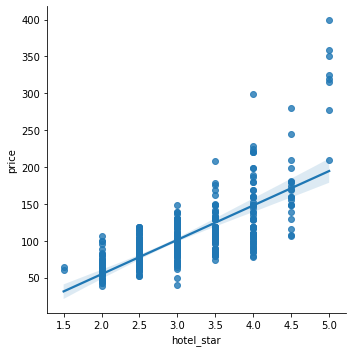

In [70]:
sns.lmplot("hotel_star","price", df, palette="GnBu")
title = plt.title("Total Review Boxplot")
plt.xlabel('Number of Review')

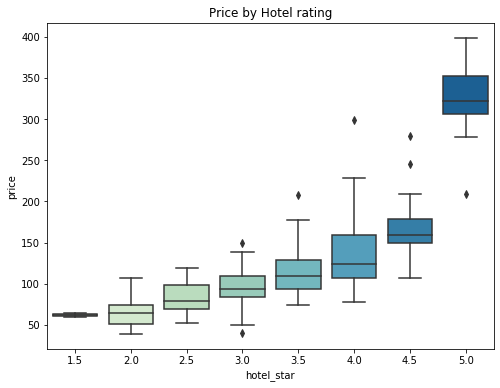

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='hotel_star', y='price', data=df, palette='GnBu')
title = plt.title('Price by Hotel rating')

Text(0, 0.5, 'Price/night($)')

<Figure size 576x432 with 0 Axes>

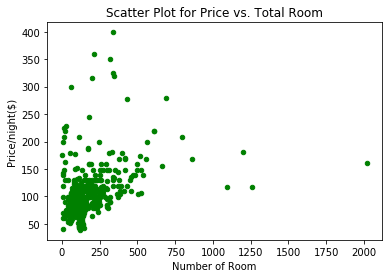

In [76]:
plt.figure(figsize=(8, 6))
df.plot.scatter(x='total_rooms',y='price',c='g')
title = plt.title('Scatter Plot for Price vs. Total Room')
plt.xlabel('Number of Room')
plt.ylabel('Price/night($)')

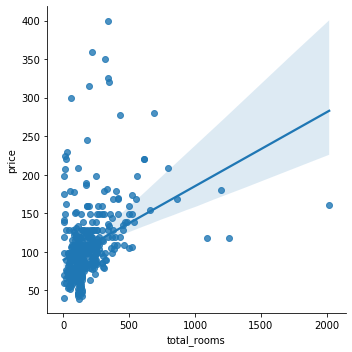

In [77]:
sns.lmplot("total_rooms","price", df, palette="GnBu")

Text(0, 0.5, 'Price/night($)')

<Figure size 576x432 with 0 Axes>

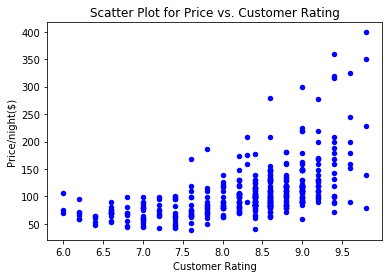

In [82]:
plt.figure(figsize=(8, 6))
df.plot.scatter(x='rating_avg',y='price',c='b')
title = plt.title('Scatter Plot for Price vs. Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Price/night($)')

Text(0, 0.5, 'Price/night($)')

<Figure size 576x432 with 0 Axes>

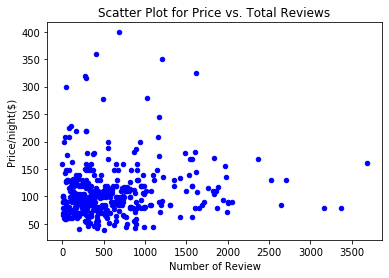

In [85]:
plt.figure(figsize=(8, 6))
df.plot.scatter(x='total_reviews',y='price',c='b')
title = plt.title('Scatter Plot for Price vs. Total Reviews')
plt.xlabel('Number of Review')
plt.ylabel('Price/night($)')

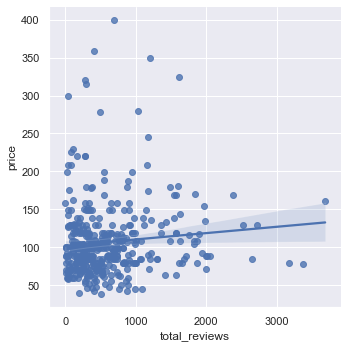

In [185]:
sns.lmplot("total_reviews","price", df, palette="GnBu")

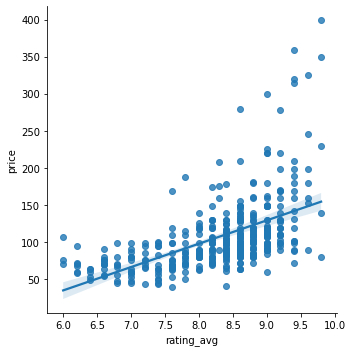

In [79]:
sns.lmplot("rating_avg","price", df, palette="GnBu")

<Figure size 576x432 with 0 Axes>

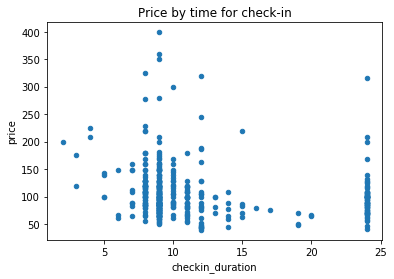

In [83]:
plt.figure(figsize=(8, 6))
df.plot.scatter(x='checkin_duration',y='price')
title = plt.title('Scatter Plot for Price vs. time for check-in')
plt.xlabel('')
plt.ylabel('Price/night($)')

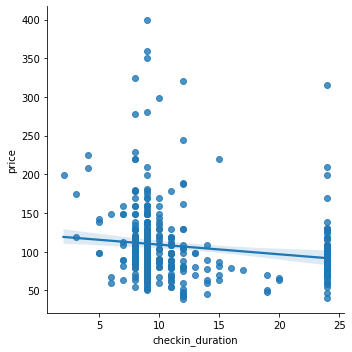

In [84]:
sns.lmplot("checkin_duration","price", df, palette="GnBu")

## Categorical variables 

In [95]:
df_c.tail()

,title,hotel_star,price,total_rooms,rating_avg,total_reviews,rating_cat,checkin,checkout,checkin_from,checkin_to,checkin_duration,map,lat,long
102,The Guesthouse Hotel,4.0,229,25,9.8,104,Exceptional,4 PM-midnight,10:00 AM,4:00 PM,midnight,8,"['41.97093', '-87.66795']",41.970930,-87.667950
54,The Sono Chicago,3.5,139,7,9.8,163,Exceptional,3 PM-8 PM,11:00 AM,3:00 PM,8:00 PM,5,"['41.908411', '-87.640967']",41.908411,-87.640967
28,"The Langham, Chicago",5.0,350,316,9.8,1205,Exceptional,3 PM-midnight,noon,3:00 PM,midnight,9,"['41.888472', '-87.627199']",41.888472,-87.627199
93,The Peninsula Chicago,5.0,399,339,9.8,688,Exceptional,3 PM-midnight,noon,3:00 PM,midnight,9,"['41.89572', '-87.62501']",41.895720,-87.625010
337,Four Points by Sheraton Chicago Schaumburg,2.5,79,96,9.8,14,Exceptional,3 PM-2:00 AM,noon,3:00 PM,2:00 AM,11,"['42.040636', '-88.051838']",42.040636,-88.051838


In [189]:
df.groupby('rating_cat')['rating_avg'].mean()

rating_cat
Exceptional    9.403096
Fabulous       8.677228
Good           7.125234
Superb         9.068493
Very Good      8.255769
Name: rating_avg, dtype: float64

In [190]:
df.groupby('rating_cat')['rating_avg'].min()

rating_cat
Exceptional    8.300723
Fabulous       8.600000
Good           6.000000
Superb         9.000000
Very Good      8.000000
Name: rating_avg, dtype: float64

In [191]:
df.groupby('rating_cat')['rating_avg'].max()

rating_cat
Exceptional    9.8
Fabulous       8.8
Good           7.8
Superb         9.2
Very Good      8.4
Name: rating_avg, dtype: float64

Text(0.5, 1.0, 'Price vs Hotel Rating Type')

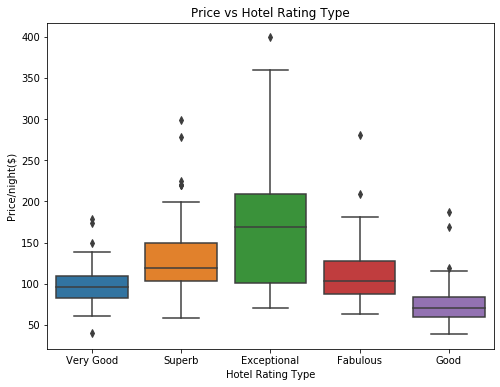

In [117]:
#box plot overallqual/saleprice
var = 'rating_cat'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
plt.xlabel("Hotel Rating Type")
plt.ylabel("Price/night($)")
plt.title("Price vs Hotel Rating Type")

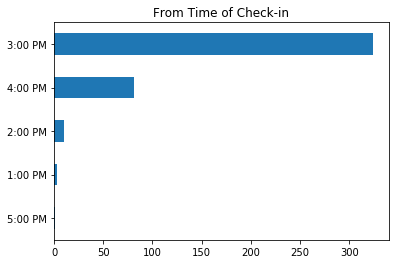

In [118]:
df['checkin_from'].value_counts().sort_values().plot(kind = 'barh')
title = plt.title('From Time of Check-in')


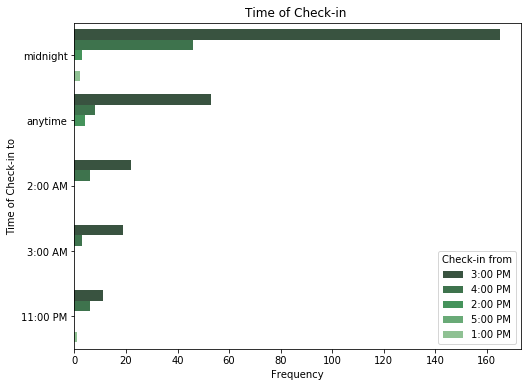

In [128]:
plt.figure(figsize=(8, 6))
sns.countplot(y="checkin_to", hue="checkin_from", data=df, palette="Greens_d",
              order=df.checkin_to.value_counts().iloc[:5].index)
title = plt.title('Time of Check-in ')
plt.ylabel ("Time of Check-in to")
plt.xlabel ("Frequency")
plt.legend(loc="lower right", title="Check-in from")

Text(0.5, 0, 'Frequency')

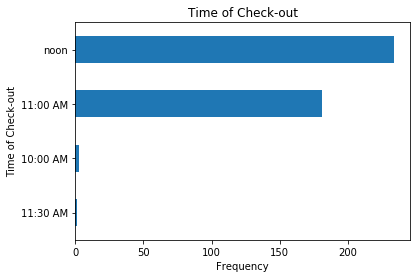

In [130]:
df['checkout'].value_counts().sort_values().plot(kind = 'barh')
title = plt.title('Time of Check-out')
plt.ylabel ("Time of Check-out")
plt.xlabel ("Frequency")

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(y="checkin_to", hue="rating_cat", data=df, palette="husl",
              order=df.checkin_to.value_counts().iloc[:10].index)
title = plt.title('Top 10 Last Time of Check-in by Customer Rating ')
plt.legend(loc="lower right")

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(y="checkout", hue="hotel_star", data=df, palette="Set2")
title = plt.title('Time of Checkoutn by Hotel rating ')
plt.legend(loc="lower right")

## Spliting data

In [134]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

In [138]:
print(len(df_train))
print(len(df_test))

334
84


In [135]:
df_train =df_train[~df_train.isin([np.nan, np.inf, -np.inf]).any(1)]
df_test =df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(1)]

X_train = df_train[['hotel_star','rating_avg','total_rooms','total_reviews']]
y_train = df_train['price']

X_test = df_test[['hotel_star','rating_avg','total_rooms','total_reviews']]
y_test = df_test['price']

In [141]:
#correlation matrix
corrmat = df_train.corr()
corrmat

,hotel_star,price,total_rooms,rating_avg,total_reviews,checkin_duration,lat,long
hotel_star,1.000000,0.707763,0.481489,0.594109,0.390833,-0.180651,0.150845,0.228830
price,0.707763,1.000000,0.331549,0.533537,0.114431,-0.153307,-0.070944,0.366559
total_rooms,0.481489,0.331549,1.000000,0.216257,0.492734,-0.128563,0.115406,0.108115
rating_avg,0.594109,0.533537,0.216257,1.000000,0.190901,-0.148547,0.150618,0.220492
total_reviews,0.390833,0.114431,0.492734,0.190901,1.000000,-0.141825,0.125868,0.213186
checkin_duration,-0.180651,-0.153307,-0.128563,-0.148547,-0.141825,1.000000,-0.102419,-0.079034
lat,0.150845,-0.070944,0.115406,0.150618,0.125868,-0.102419,1.000000,-0.435047
long,0.228830,0.366559,0.108115,0.220492,0.213186,-0.079034,-0.435047,1.000000


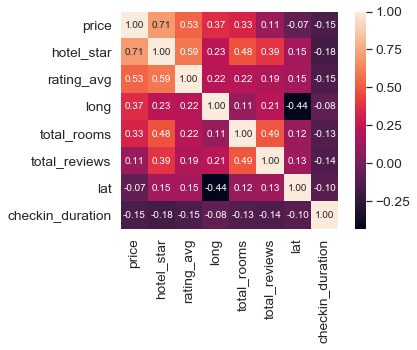

In [143]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

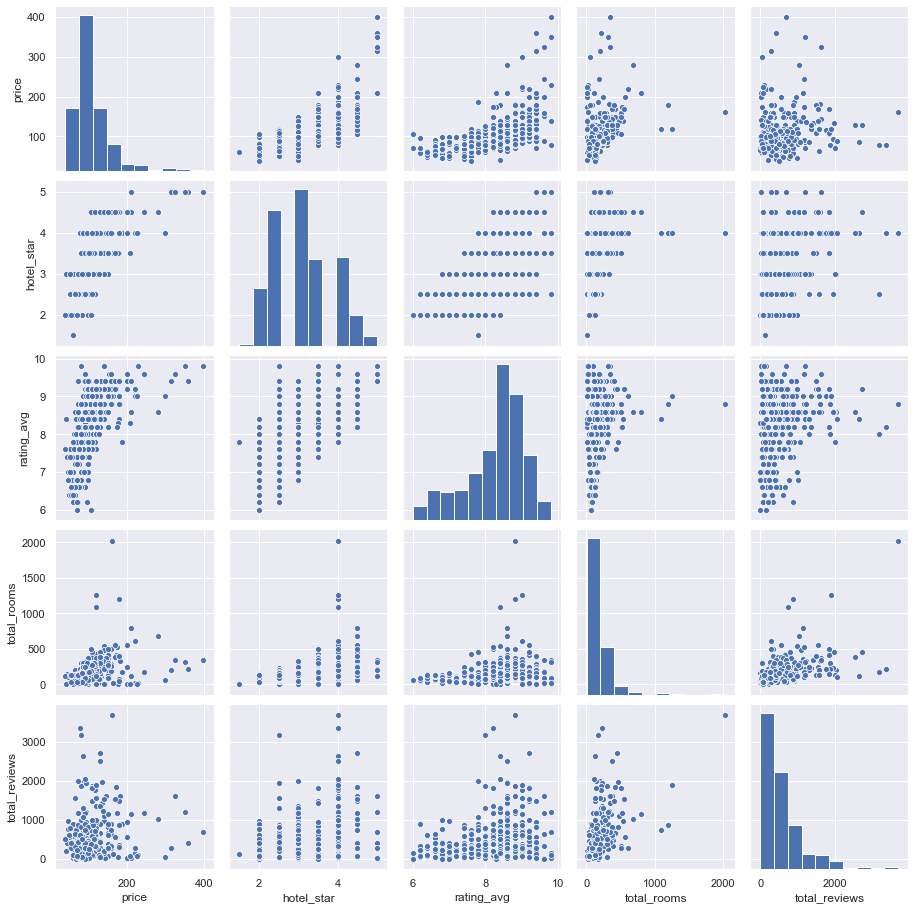

In [144]:
#scatterplot
sns.set()
cols = ['price', 'hotel_star', 'rating_avg', 'total_rooms','total_reviews']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Outliers

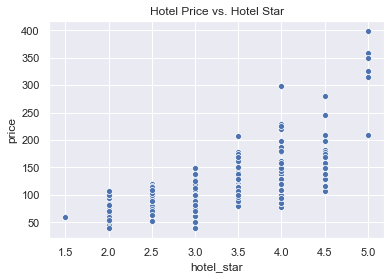

In [145]:
sns.set_style('darkgrid')
sns.scatterplot(x='hotel_star', y='price', data=df_train)
title = plt.title('Hotel Price vs. Hotel Star')

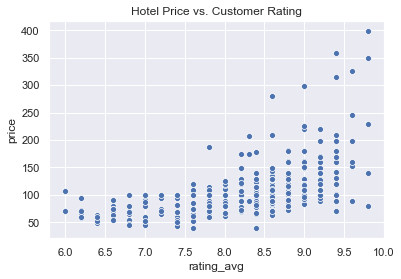

In [146]:
sns.set_style('darkgrid')
sns.scatterplot(x='rating_avg', y='price', data=df_train)
title = plt.title('Hotel Price vs. Customer Rating')

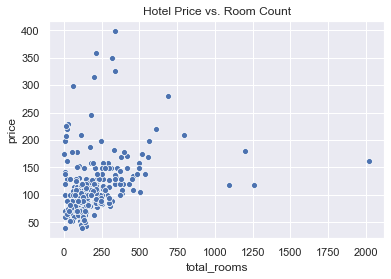

In [147]:
sns.set_style('darkgrid')
sns.scatterplot(x='total_rooms', y='price', data=df_train)
title = plt.title('Hotel Price vs. Room Count')

In [148]:
outlier_index = df_train[(df_train.total_rooms > 750)
                           & (df_train.price > 300) | (df_train.total_rooms > 1000)
                           & (df_train.price < 300)].index
df_train.drop(outlier_index, axis=0, inplace=True)

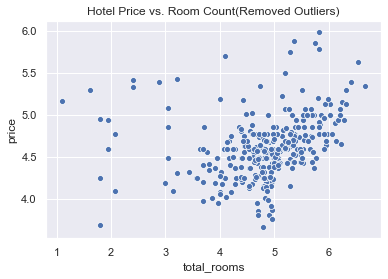

In [192]:
sns.set_style('darkgrid')
sns.scatterplot(x='total_rooms', y='price', data=df_train)
title = plt.title('Hotel Price vs. Room Count(Removed Outliers)')

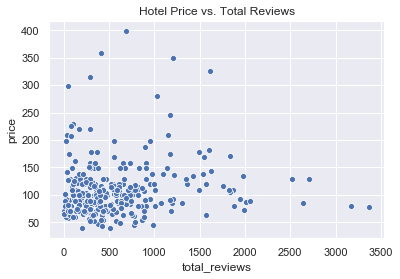

In [151]:
sns.set_style('darkgrid')
sns.scatterplot(x='total_reviews', y='price', data=df_train)
title = plt.title('Hotel Price vs. Total Reviews')

In [152]:
outlier_index1 = df_train[(df_train.total_reviews > 2100)
                           & (df_train.price < 200)].index
df_train.drop(outlier_index1, axis=0, inplace=True)

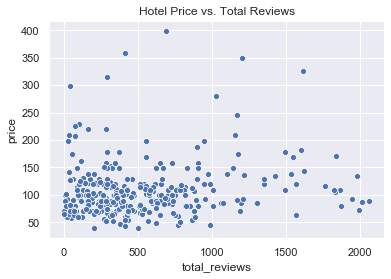

In [153]:
sns.set_style('darkgrid')
sns.scatterplot(x='total_reviews', y='price', data=df_train)
title = plt.title('Hotel Price vs. Total Reviews')

## Data transformation

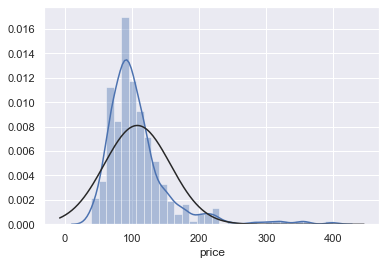

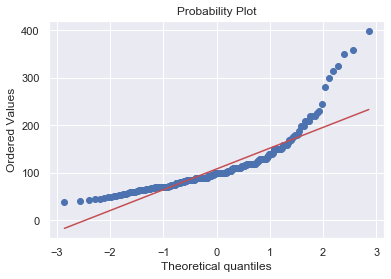

In [154]:
#histogram and normal probability plot
sns.distplot(df_train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [155]:
#applying log transformation
df_train['price'] = np.log(df_train['price'])

In [157]:
#skewness and kurtosis
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 0.684856
Kurtosis: 1.377187


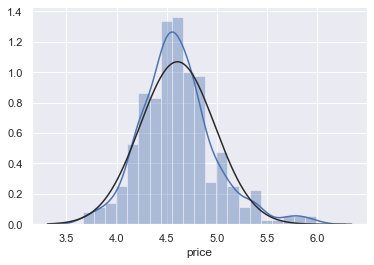

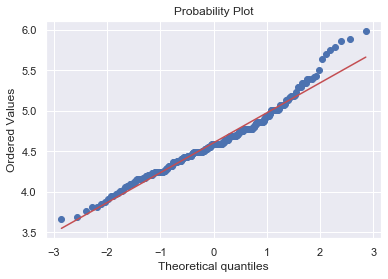

In [158]:
#transformed histogram and normal probability plot
sns.distplot(df_train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

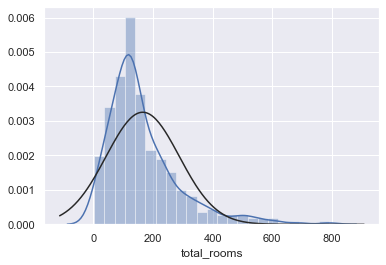

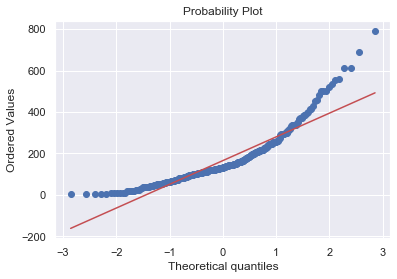

In [159]:
#histogram and normal probability plot
sns.distplot(df_train['total_rooms'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['total_rooms'], plot=plt)

In [160]:
#skewness and kurtosis
print("Skewness: %f" % df['total_rooms'].skew())
print("Kurtosis: %f" % df['total_rooms'].kurt())

Skewness: 4.552327
Kurtosis: 34.247762


In [161]:
#applying log transformation
df_train['total_rooms'] = np.log(df_train['total_rooms'])

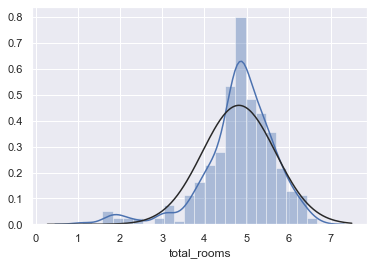

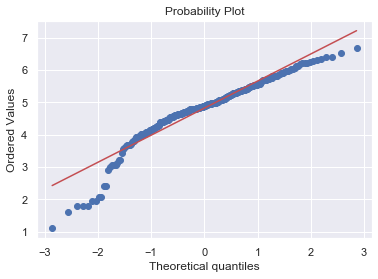

In [162]:
#transfored histogram and normal probability plot
sns.distplot(df_train['total_rooms'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['total_rooms'], plot=plt)

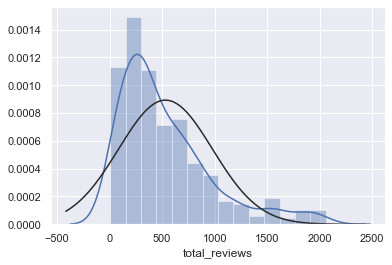

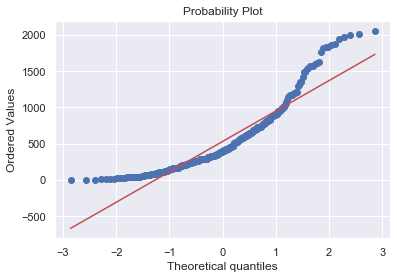

In [163]:
#histogram and normal probability plot
sns.distplot(df_train['total_reviews'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['total_reviews'], plot=plt)

In [164]:
#skewness and kurtosis
print("Skewness: %f" % df['total_reviews'].skew())
print("Kurtosis: %f" % df['total_reviews'].kurt())

Skewness: 2.045136
Kurtosis: 5.710360


In [165]:
#applying log transformation
df_train['total_reviews'] = np.log(df_train['total_reviews'])

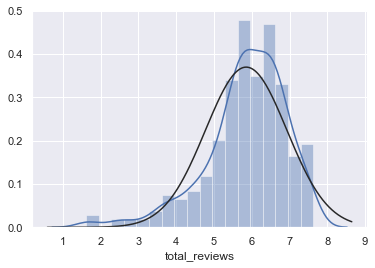

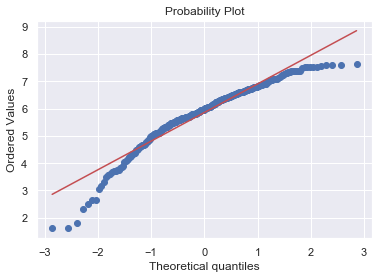

In [166]:
#histogram and normal probability plot
sns.distplot(df_train['total_reviews'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['total_reviews'], plot=plt)

In [194]:
#skewness and kurtosis
print("Skewness: %f" % df['checkin_duration'].skew())
print("Kurtosis: %f" % df['checkin_duration'].kurt())

Skewness: 1.476912
Kurtosis: 0.722970


In [167]:
df_train['hotel_star'] = np.log(df_train['hotel_star'])
df_train['rating_avg'] = np.log(df_train['rating_avg'])

In [ ]:
#applying log transformation for test dataset
df_test['total_reviews'] = np.log(df_test['total_reviews'])
df_test['total_rooms'] = np.log(df_test['total_rooms'])
df_test['rating_avg'] = np.log(df_test['rating_avg'])
df_test['hotel_star'] = np.log(df_test['hotel_star'])

## Modeling

In [168]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
hotel_star,43.157556
rating_avg,9.864651
total_rooms,0.023419
total_reviews,-0.018863


In [170]:
#Making prediction 
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [183]:
df_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_predicted

,Actual,Predicted
324,101,105.974156
108,127,100.189842
281,80,93.711221
242,99,75.007646
198,169,121.354466
...,...,...
277,139,132.125588
209,75,59.400896
118,79,71.785641
303,99,108.728153


In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Mean Squared Error train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

Mean Squared Error train: 1069.167, test: 803.863
R^2 train: 0.554, test: 0.583
